In [1]:
import pandas as pd

# Read the tab-separated file into a DataFrame
df = pd.read_csv('labels.txt', sep="\t")
df.head()

,Clip,Start,End
0,1,47,50
1,2,97,100
2,3,128,131
3,4,93,96
4,5,32,34


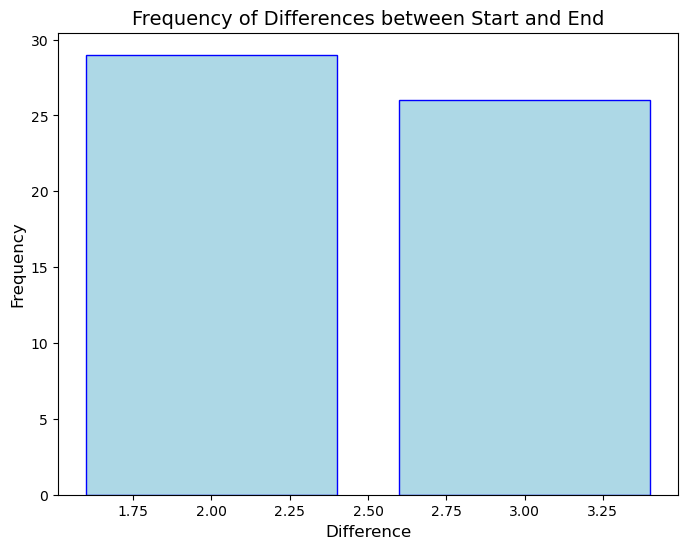

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the difference between Start and End columns
df['Difference'] = df['End'] - df['Start']

# Plot a bar chart for the Difference column
# Calculate frequency of each unique difference value
difference_counts = df['Difference'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(difference_counts.index, difference_counts.values, color='lightblue', edgecolor='blue')

# Add title and labels
plt.title("Frequency of Differences between Start and End", fontsize=14)
plt.xlabel("Difference", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.show()
